In [ ]:
import pandas as pd
import numpy as np
import pickle
from itertools import product, cycle


import matplotlib.pyplot as plt
import seaborn as sns


# importing standariztion function
from sklearn import preprocessing
from mlxtend.plotting import plot_decision_regions

#importing imputation methods
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

# importing classifiers and tools
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.impute import MissingIndicator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, cross_validate, cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, label_binarize
from sklearn.multiclass import OneVsRestClassifier

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# function for cross validation using stratified K-Fold method
def cross_validation(model, X, y):
    
    random_state = np.random.RandomState(0)
    _cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state)
    _scoring = ['accuracy','precision_weighted', 'recall_weighted', 'f1_weighted']
    results = cross_validate(estimator=model,
                              X=X,
                              y=y,
                              cv=_cv,
                              scoring=_scoring,
                              return_train_score=True)
    
    return {"Training Accuracy scores": results['train_accuracy'],
          "Mean Training Accuracy": results['train_accuracy'].mean()*100,
          "Training Precision scores": results['train_precision_weighted'],
          "Mean Training Precision": results['train_precision_weighted'].mean(),
          "Training Recall scores": results['train_recall_weighted'],
          "Mean Training Recall": results['train_recall_weighted'].mean(),
          "Training F1 scores": results['train_f1_weighted'],
          "Mean Training F1 Score": results['train_f1_weighted'].mean(),
          "Validation Accuracy scores": results['test_accuracy'],
          "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
          "Validation Precision scores": results['test_precision_weighted'],
          "Mean Validation Precision": results['test_precision_weighted'].mean(),
          "Validation Recall scores": results['test_recall_weighted'],
          "Mean Validation Recall": results['test_recall_weighted'].mean(),
          "Validation F1 scores": results['test_f1_weighted'],
          "Mean Validation F1 Score": results['test_f1_weighted'].mean(),
          }


In [ ]:
# Specify the imputation method: knn, median, linear regress
imput_meth = 'knn'

In [ ]:
# read in data
if imput_meth == 'knn':
    data = pd.read_csv('knn_imputed_data.csv')
elif imputed_meth == 'median':
    data = pd.read_csv('median_imputed_data.csv')
elif imputed_meth == 'linear regression':
    data = pd.read_csv('lr_imputed_data.csv')

In [ ]:
# Reset the index
data = data.reset_index(drop=True)

# Seperate X and y
X = data.drop(['DX_bl'], axis = 1).to_numpy()
y = data[['DX_bl']]

In [ ]:
clf1 = classifier = OneVsRestClassifier(make_pipeline(MinMaxScaler(), DecisionTreeClassifier(max_depth = 32)))
clf2 = classifier = OneVsRestClassifier(make_pipeline(MinMaxScaler(), SVC(probability = True)))
clf3 = classifier = OneVsRestClassifier(make_pipeline(MinMaxScaler(), XGBClassifier(objective = 'multi:softprob', learning_rate = 0.5, max_depth = 5, n_estimators = 180, num_class=4)))
clf4 = classifier = OneVsRestClassifier(make_pipeline(MinMaxScaler(), RandomForestClassifier()))
clf5 = classifier = OneVsRestClassifier(make_pipeline(MinMaxScaler(), MLPClassifier(random_state=1,hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam')))

In [ ]:
DT_result = cross_validation(clf1, X, y)
SVC_result = cross_validation(clf2, X, y)
XGB_result = cross_validation(clf3, X, y)
RF_result = cross_validation(clf4, X, y)
MLP_result = cross_validation(clf5, X, y)

In [ ]:
DT_result

{'Mean Training Accuracy': 100.0,
 'Mean Training F1 Score': 1.0,
 'Mean Training Precision': 1.0,
 'Mean Training Recall': 1.0,
 'Mean Validation Accuracy': 99.58274708043179,
 'Mean Validation F1 Score': 0.9958291271296229,
 'Mean Validation Precision': 0.9958530992778105,
 'Mean Validation Recall': 0.9958274708043179,
 'Training Accuracy scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Training F1 scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Training Precision scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Training Recall scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Validation Accuracy scores': array([0.99620925, 0.99772555, 0.9939302 , 0.99620637, 0.99468892,
        0.9969651 , 0.9969651 , 0.99620637, 0.9939302 , 0.99544765]),
 'Validation F1 scores': array([0.99621766, 0.99773022, 0.99393297, 0.99620509, 0.99469458,
        0.99696644, 0.99696615, 0.99620227, 0.99392695, 0.99544895]),
 'Validation Precision scores': array([0.9

In [ ]:
SVC_result

{'Mean Training Accuracy': 98.76936513451021,
 'Mean Training F1 Score': 0.9877195791449139,
 'Mean Training Precision': 0.9878433692401268,
 'Mean Training Recall': 0.9876936513451021,
 'Mean Validation Accuracy': 98.05036923866312,
 'Mean Validation F1 Score': 0.9805525788168513,
 'Mean Validation Precision': 0.9808373047659286,
 'Mean Validation Recall': 0.9805036923866313,
 'Training Accuracy scores': array([0.98752424, 0.98727135, 0.98685098, 0.98651382, 0.98853675,
        0.98752529, 0.98769386, 0.98676669, 0.99022252, 0.98803102]),
 'Training F1 scores': array([0.98755001, 0.98730483, 0.98687753, 0.9865484 , 0.98855993,
        0.98755166, 0.98771549, 0.98680206, 0.99023591, 0.98804997]),
 'Training Precision scores': array([0.98767526, 0.98747502, 0.98701345, 0.98669966, 0.98865562,
        0.98769341, 0.9878268 , 0.98695831, 0.99031112, 0.98812504]),
 'Training Recall scores': array([0.98752424, 0.98727135, 0.98685098, 0.98651382, 0.98853675,
        0.98752529, 0.98769386, 0

In [ ]:
XGB_result

{'Training Accuracy scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Accuracy': 100.0,
 'Training Precision scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Precision': 1.0,
 'Training Recall scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Recall': 1.0,
 'Training F1 scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training F1 Score': 1.0,
 'Validation Accuracy scores': array([0.99772555, 0.99772555, 0.99620637, 0.99848255, 0.9969651 ,
        0.99924127, 0.99924127, 0.99620637, 0.99772382, 0.99620637]),
 'Mean Validation Accuracy': 99.75724240440577,
 'Validation Precision scores': array([0.99773152, 0.99773588, 0.99621285, 0.99848411, 0.99698205,
        0.99924426, 0.99924426, 0.99620762, 0.99773102, 0.99621573]),
 'Mean Validation Precision': 0.9975789292699245,
 'Validation Recall scores': array([0.99772555, 0.99772555, 0.99620637, 0.99848255, 0.9969651 ,
        0.99924127, 0.99924127, 0.9

In [ ]:
RF_result

{'Training Accuracy scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Accuracy': 100.0,
 'Training Precision scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Precision': 1.0,
 'Training Recall scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Recall': 1.0,
 'Training F1 scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training F1 Score': 1.0,
 'Validation Accuracy scores': array([0.99772555, 0.9984837 , 0.99468892, 0.99772382, 0.99772382,
        0.99848255, 0.99848255, 0.99544765, 0.99620637, 0.99772382]),
 'Mean Validation Accuracy': 99.72688763847168,
 'Validation Precision scores': array([0.99773152, 0.99849559, 0.9947122 , 0.99772703, 0.99773303,
        0.99849445, 0.99849445, 0.99545664, 0.99620685, 0.99772682]),
 'Mean Validation Precision': 0.997277857992518,
 'Validation Recall scores': array([0.99772555, 0.9984837 , 0.99468892, 0.99772382, 0.99772382,
        0.99848255, 0.99848255, 0.99

In [ ]:
MLP_result

{'Training Accuracy scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Accuracy': 100.0,
 'Training Precision scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Precision': 1.0,
 'Training Recall scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training Recall': 1.0,
 'Training F1 scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Training F1 Score': 1.0,
 'Validation Accuracy scores': array([0.9969674 , 0.9969674 , 0.99620637, 0.99772382, 0.99620637,
        0.99848255, 0.9969651 , 0.99620637, 0.9939302 , 0.9939302 ]),
 'Mean Validation Accuracy': 99.63585785433165,
 'Validation Precision scores': array([0.99697337, 0.99699801, 0.99621702, 0.99773102, 0.99622295,
        0.99848255, 0.99696928, 0.99623153, 0.99393563, 0.99393666]),
 'Mean Validation Precision': 0.9963698011792644,
 'Validation Recall scores': array([0.9969674 , 0.9969674 , 0.99620637, 0.99772382, 0.99620637,
        0.99848255, 0.9969651 , 0.9

In [ ]:
# Function for plotting AUC ROC Curve 
def roc_curve_func(clf, X, y):
    classes = ['CN', 'AD', 'LMCI', 'EMCI']
    n_classes = y.shape[1]
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []
    aucs = []
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Plots the Probability Distributions and the ROC Curves One vs Rest
    plt.figure(figsize = (12, 10))
    
    
    x_train, x_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=0)

    probas_ = clf.fit(x_train, y_train).predict_proba(x_test)

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], probas_[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), probas_.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
        color="navy",
        linestyle=":",
        linewidth=4,
    )


    lw = 2      
    colors = cycle(["aqua", "darkorange", "cornflowerblue", "green"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
            fpr[i],
            tpr[i],
            color=color,
            lw=lw,
            label="ROC curve of class {0} (area = {1:0.2f})".format(classes[i], roc_auc[i]),
        )

    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
y = data[['DX_bl']]
y = label_binarize(y, classes=[0,1,2,3])

<Figure size 864x720 with 0 Axes>

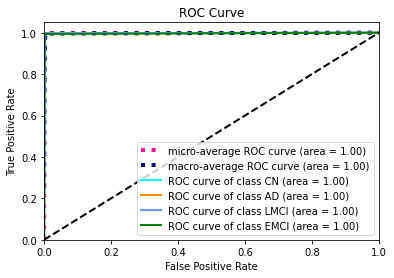

In [ ]:
#Plot for Decision Tree Classifier
roc_curve_func(clf1, X, y)

In [ ]:
#Plot for Support Vetctor Classifier
roc_curve_func(clf2, X, y)

In [ ]:
#Plot for XG Boost Classifier
roc_curve_func(clf3, X, y)

In [ ]:
#Plot for Random Forest Classifier
roc_curve_func(clf4, X, y)

In [ ]:
#Plot for Multi-Layer Peceptron
roc_curve_func(clf5, X, y)